In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
     

In [11]:
dataset_test = pd.read_csv(r"C:\Project\MobileTest.csv")
dataset_train = pd.read_csv(r"C:\Project\MobileTrain.csv")

In [12]:
# CHECKING THE DATASET

In [13]:
dataset_test.head()


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [20]:
dataset_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [22]:
dataset_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [23]:
dataset_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [24]:
#Basic information about the train dataset
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [25]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [26]:
# Statistical information about the dataset
dataset_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [27]:
dataset_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [28]:
dataset_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [29]:
dataset_test.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [ ]:
#The train and test data does not contain any categorical values.All values are numerical type.

In [30]:
# Checking null values in train dataset
dataset_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [31]:
# Checking null values in test dataset
dataset_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [ ]:
# There are no null values present in train and test dataset.

In [32]:
#Number of unique values
dataset_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [33]:
dataset_test.nunique()

id               1000
battery_power     721
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height         694
px_width          743
ram               872
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
dtype: int64

In [37]:
round(dataset_train.describe(),1).T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5,439.4,501.0,851.8,1226.0,1615.2,1998.0
blue,2000.0,0.5,0.5,0.0,0.0,0.0,1.0,1.0
clock_speed,2000.0,1.5,0.8,0.5,0.7,1.5,2.2,3.0
dual_sim,2000.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
fc,2000.0,4.3,4.3,0.0,1.0,3.0,7.0,19.0
four_g,2000.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
int_memory,2000.0,32.0,18.1,2.0,16.0,32.0,48.0,64.0
m_dep,2000.0,0.5,0.3,0.1,0.2,0.5,0.8,1.0
mobile_wt,2000.0,140.2,35.4,80.0,109.0,141.0,170.0,200.0
n_cores,2000.0,4.5,2.3,1.0,3.0,4.0,7.0,8.0


In [38]:

round(dataset_test.describe(),1).T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.5,288.8,1.0,250.8,500.5,750.2,1000.0
battery_power,1000.0,1248.5,432.5,500.0,895.0,1246.5,1629.2,1999.0
blue,1000.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
clock_speed,1000.0,1.5,0.8,0.5,0.7,1.5,2.3,3.0
dual_sim,1000.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
fc,1000.0,4.6,4.5,0.0,1.0,3.0,7.0,19.0
four_g,1000.0,0.5,0.5,0.0,0.0,0.0,1.0,1.0
int_memory,1000.0,33.7,18.1,2.0,18.0,34.5,49.0,64.0
m_dep,1000.0,0.5,0.3,0.1,0.3,0.5,0.8,1.0
mobile_wt,1000.0,139.5,34.9,80.0,109.8,139.0,170.0,200.0


## DATA PREPROCESSING

In [39]:
dataset_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [41]:
data = pd.concat([dataset_train.assign(ind="train"), dataset_test.assign(ind="test")])
     

In [42]:

data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,ind,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1.0,train,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2.0,train,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2.0,train,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2.0,train,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1.0,train,NaN


In [43]:

data.shape

(3000, 23)

In [44]:

print(data.isnull().sum())

battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
ind                 0
id               2000
dtype: int64


In [45]:
print('% of missing values in id in the data set is : ', round(data['id'].isna().sum()/len(data)*100,2), ' %')
print('% of missing values in price_range   in the data set is : ', round(data['price_range'].isna().sum()/len(data)*100,2), ' %')
     

% of missing values in id in the data set is :  66.67  %
% of missing values in price_range   in the data set is :  33.33  %


In [46]:
data.drop(['id'],axis=1,inplace=True)

In [47]:

data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,ind
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,train
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,train
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,train
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,train
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,train


In [48]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'ind'],
      dtype='object')

# Univariate analysis of Numerical features


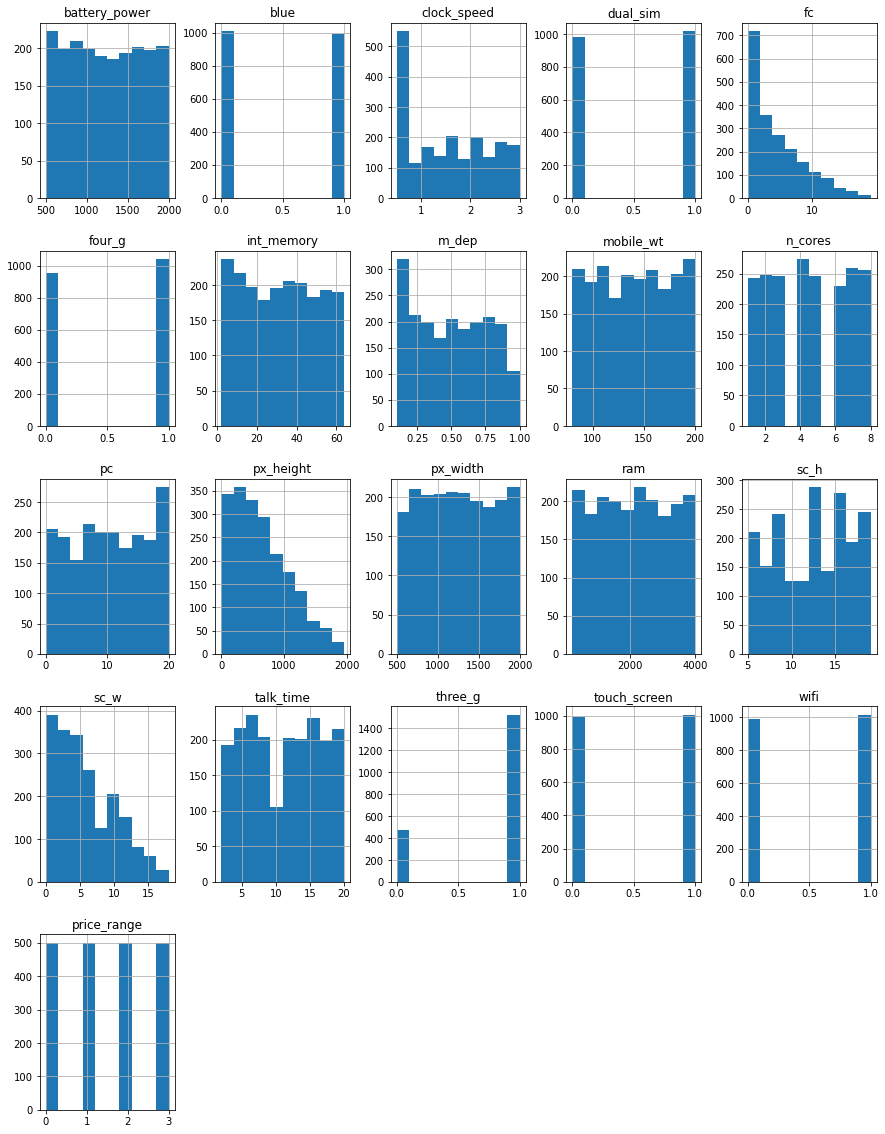

In [16]:
dataset_train.select_dtypes(include=['int64','float64']).hist(figsize = (15,20))
plt.show()

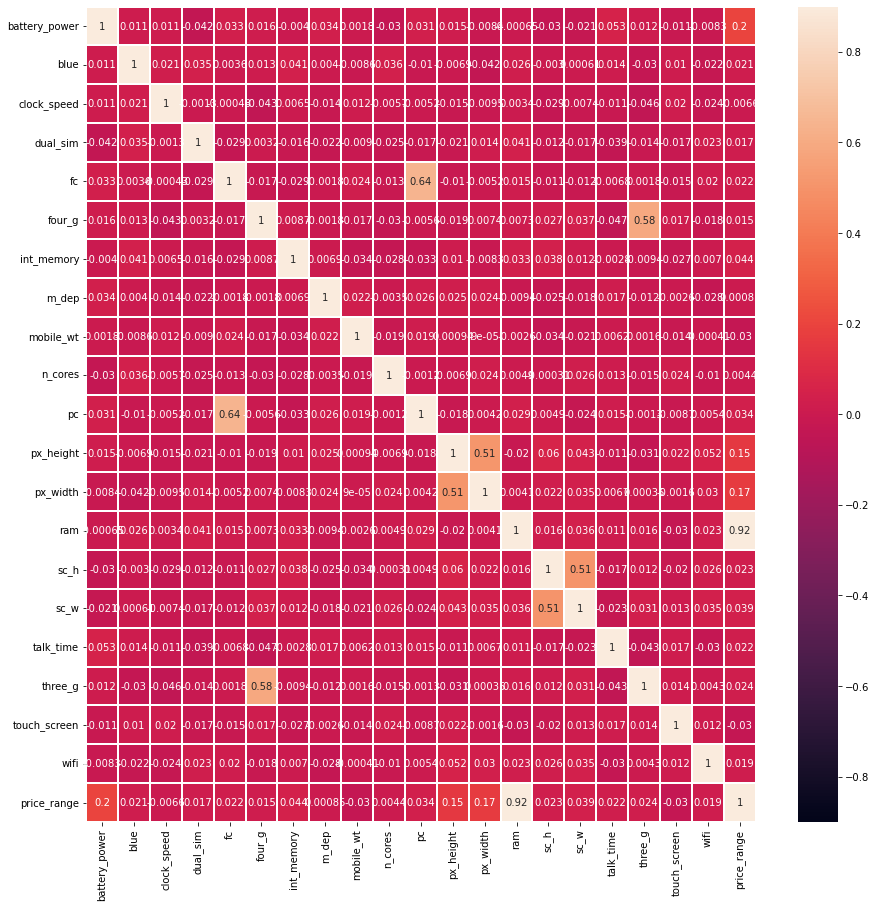

In [18]:
#CHECKING THE CORRELATION TO FIND THE SCOPE OF FEATURE REDUCTION
cor=dataset_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot= True,vmin=-.9,vmax=.9,linewidths=.2,linecolor='white')
plt.show()

# DETECTING OUTLIERS

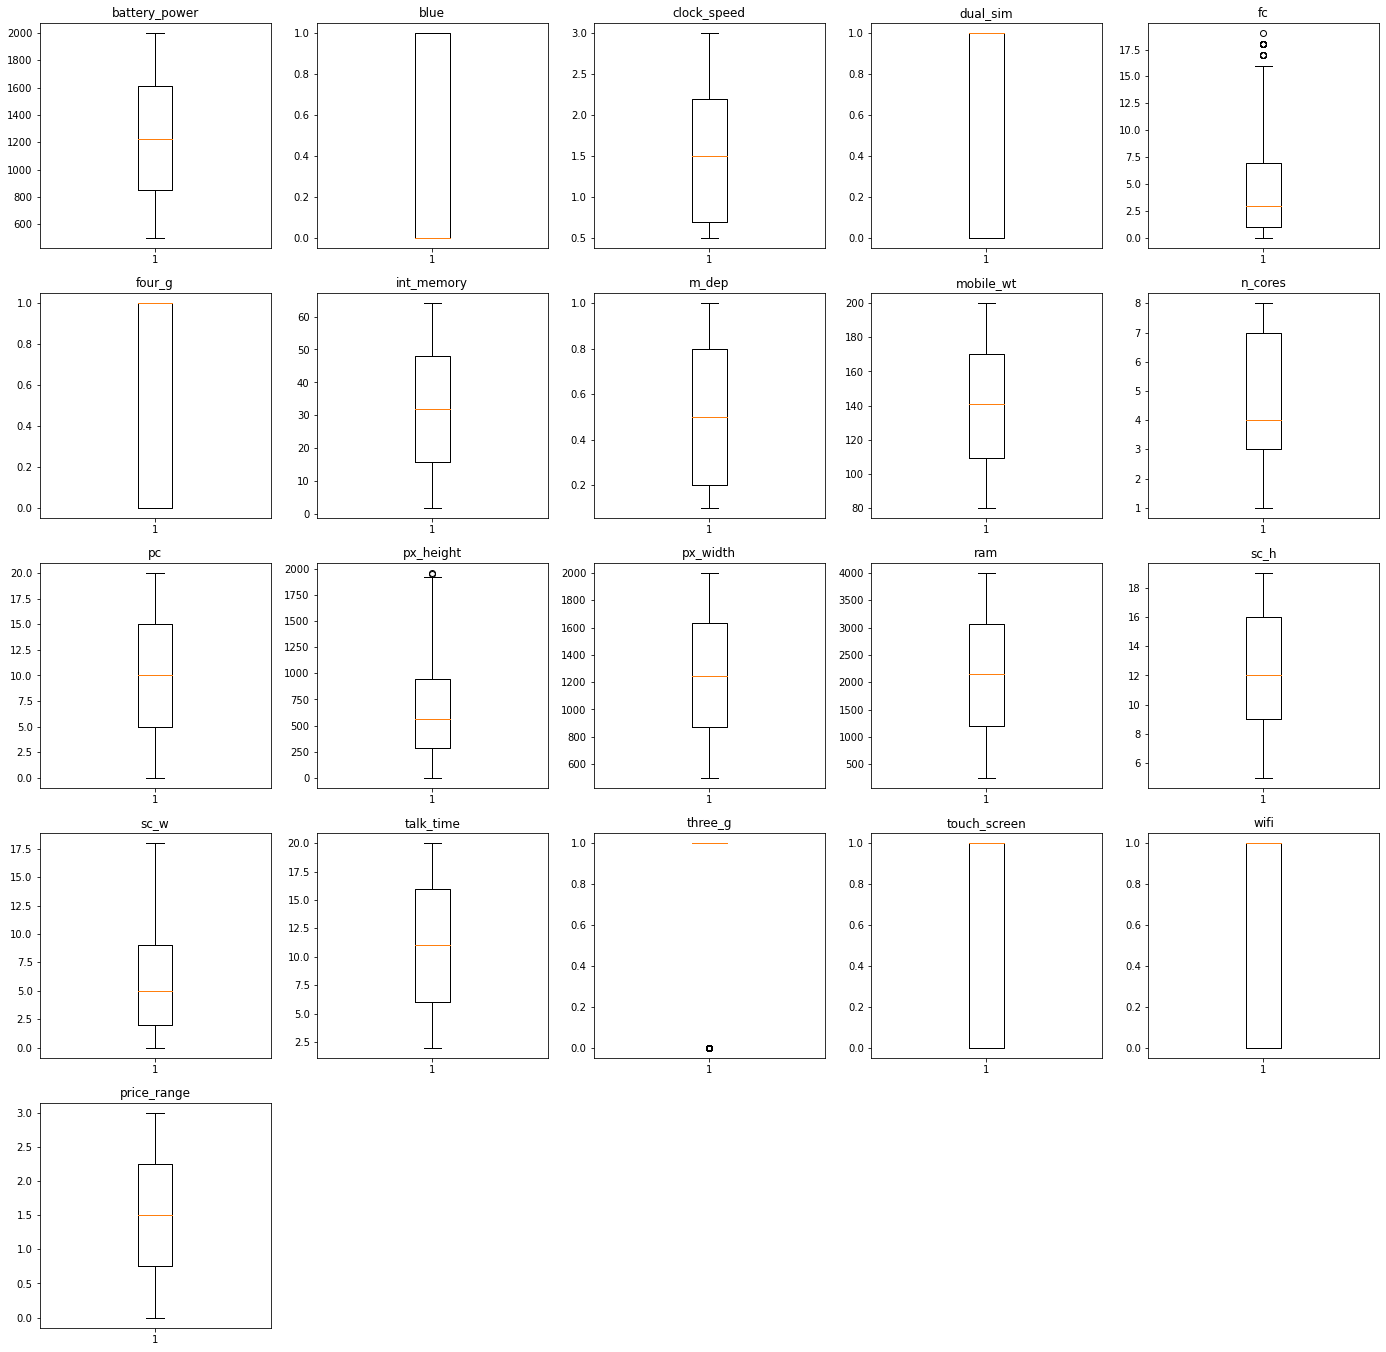

In [22]:
ax=dataset_train.select_dtypes(include=['int','float64'])

j = 1
plt.figure(figsize=(24,24))
for i in ax:
  plt.subplot(5,5,j)
  plt.title(i)
  plt.boxplot(dataset_train[i])
  j+=1
     

In [ ]:
#There are only few outliers in the dataset.Hence no need to remove those outliers.

In [ ]:
#Analyzing Target Variable(price_range)

{1: 500, 2: 500, 3: 500, 0: 500}


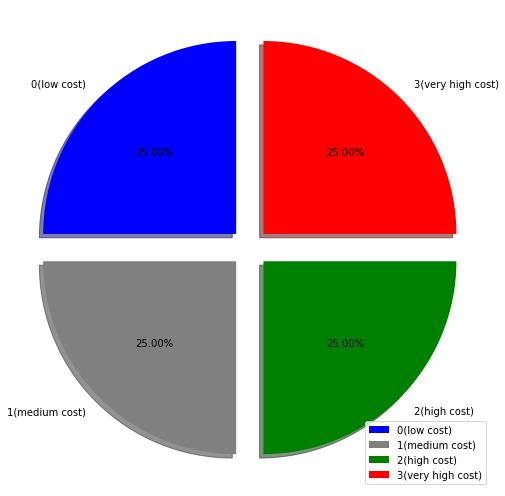

In [25]:
classification=dataset_train['price_range'].value_counts()
cls_label=['0(low cost)', '1(medium cost)', '2(high cost)','3(very high cost)']
class_label={}
leg_labels=['0(low cost)', '1(medium cost)', '2(high cost)','3(very high cost)']
label=dataset_train['price_range']
for i in label:
  if i not in class_label:
    class_label[i]=1
  else:
    class_label[i]+=1
print (class_label)
fig = plt.figure(figsize =(10, 7))
plt.pie(classification,labels=cls_label, startangle=90,colors=['blue','Gray','green','red'], shadow=True,explode=(0.1, 0.1,0.1,0.1), autopct='%1.2f%%')
plt.legend(leg_labels, loc ="lower right")
plt.tight_layout()
plt.savefig("Target_Pie.jpg")
plt.show()

In [ ]:
#From the above graph we can see that it is a balanced dataset.

In [ ]:
#Analysing Bluetooth Feature

{0: 1010, 1: 990}


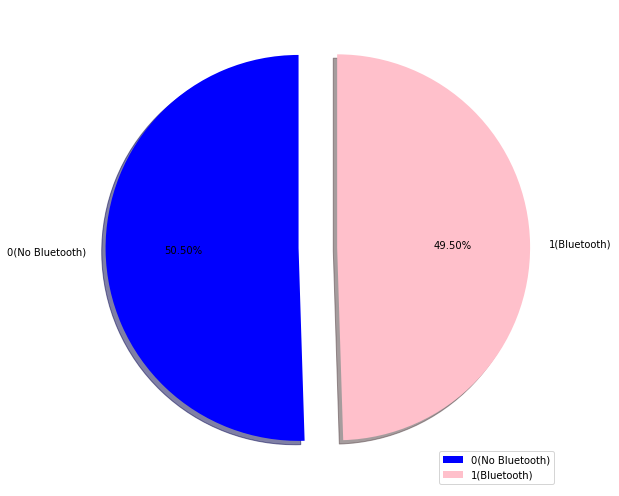

In [29]:
classification=dataset_train['blue'].value_counts()
cls_label=['0(No Bluetooth)', '1(Bluetooth)']
class_label={}
leg_labels=['0(No Bluetooth)', '1(Bluetooth)']
label=dataset_train['blue']
for i in label:
  if i not in class_label:
    class_label[i]=1
  else:
    class_label[i]+=1
print (class_label)
fig = plt.figure(figsize =(10, 7))
plt.pie(classification,labels=cls_label, startangle=90,colors=['blue','pink'], shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.legend(leg_labels, loc ="lower right")
plt.tight_layout()
plt.show()

In [ ]:
#From the graph we could see that half of the smartphone has bluetooth feature and other half does not have that feature.

In [ ]:
#Analysing Dual Sim Feature

{0: 981, 1: 1019}


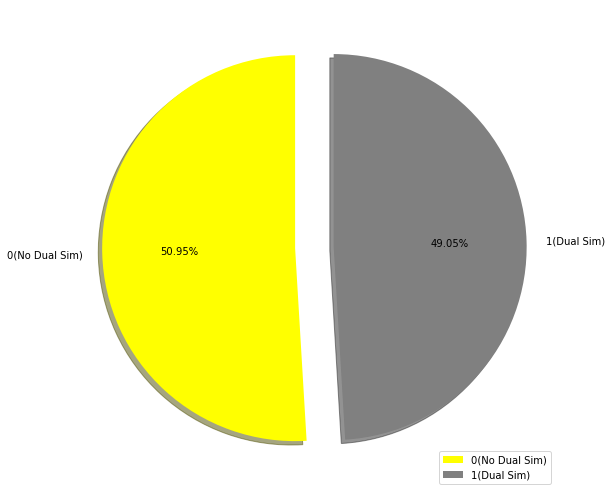

In [31]:
classification=dataset_train['dual_sim'].value_counts()
cls_label=['0(No Dual Sim)', '1(Dual Sim)']
class_label={}
leg_labels=['0(No Dual Sim)', '1(Dual Sim)']
label=dataset_train['dual_sim']
for i in label:
  if i not in class_label:
    class_label[i]=1
  else:
    class_label[i]+=1
print (class_label)
fig = plt.figure(figsize =(10, 7))
plt.pie(classification,labels=cls_label, startangle=90,colors=['yellow','grey'], shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.legend(leg_labels, loc ="lower right")
plt.tight_layout()
plt.show()
     

In [ ]:
#Most of the smartphones does not have dual sim feature.

In [ ]:
#Analysing 4G Feature

{0: 957, 1: 1043}


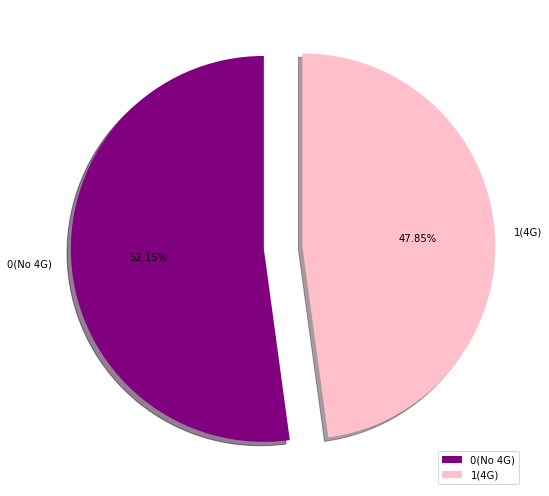

In [34]:
classification=dataset_train['four_g'].value_counts()
cls_label=['0(No 4G)', '1(4G)']
class_label={}
leg_labels=['0(No 4G)', '1(4G)']
label=dataset_train['four_g']
for i in label:
  if i not in class_label:
    class_label[i]=1
  else:
    class_label[i]+=1
print (class_label)
fig = plt.figure(figsize =(10, 7))
plt.pie(classification,labels=cls_label, startangle=90,colors=['purple','pink'], shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.legend(leg_labels, loc ="lower right")
plt.tight_layout()
plt.show()

In [ ]:
#Here the 4g feature is only available for 47.85% smartphones

In [ ]:
#Analysing n_cores Feature

{2: 247, 3: 246, 5: 246, 6: 230, 1: 242, 8: 256, 4: 274, 7: 259}


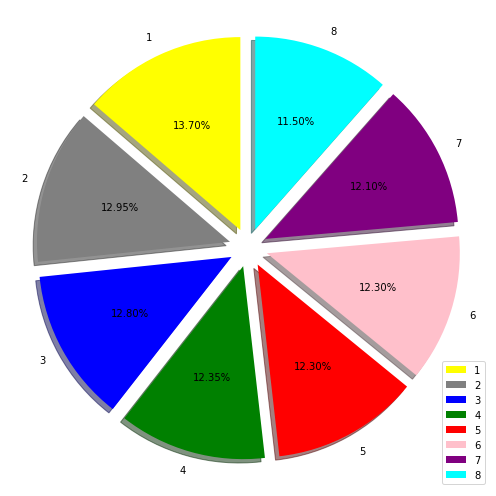

In [35]:
classification=dataset_train['n_cores'].value_counts()
cls_label=['1', '2','3','4','5','6','7','8']
class_label={}
leg_labels=['1', '2','3','4','5','6','7','8']
label=dataset_train['n_cores']
for i in label:
  if i not in class_label:
    class_label[i]=1
  else:
    class_label[i]+=1
print (class_label)
fig = plt.figure(figsize =(10, 7))
plt.pie(classification,labels=cls_label, startangle=90,colors=['yellow','grey','blue','green','red','pink','purple','cyan'], shadow=True,explode=(0.1, 0.1,0.1, 0.1,0.1, 0.1,0.1, 0.1), autopct='%1.2f%%')
plt.legend(leg_labels, loc ="lower right")
plt.tight_layout()
plt.show()

In [ ]:
#Single core smartphones are more popular compared to others.

In [ ]:
#Analysing 3G Feature


{0: 477, 1: 1523}


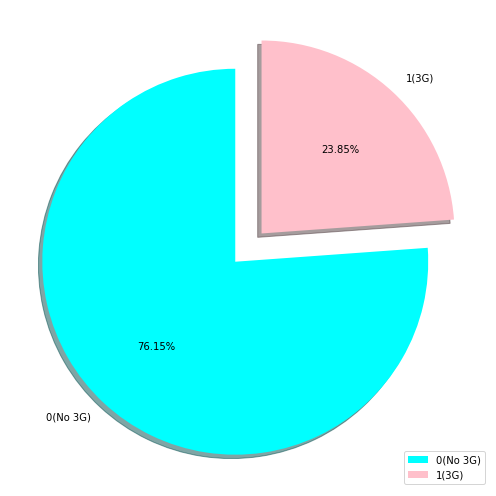

In [37]:
classification=dataset_train['three_g'].value_counts()
cls_label=['0(No 3G)', '1(3G)']
class_label={}
leg_labels=['0(No 3G)', '1(3G)']
label=dataset_train['three_g']
for i in label:
  if i not in class_label:
    class_label[i]=1
  else:
    class_label[i]+=1
print (class_label)
fig = plt.figure(figsize =(10, 7))
plt.pie(classification,labels=cls_label, startangle=90,colors=['cyan','pink'], shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.legend(leg_labels, loc ="lower right")
plt.tight_layout()
plt.show()


In [ ]:
#3G phones are less popular

In [ ]:
#Analysing wifi Feature

{1: 1014, 0: 986}


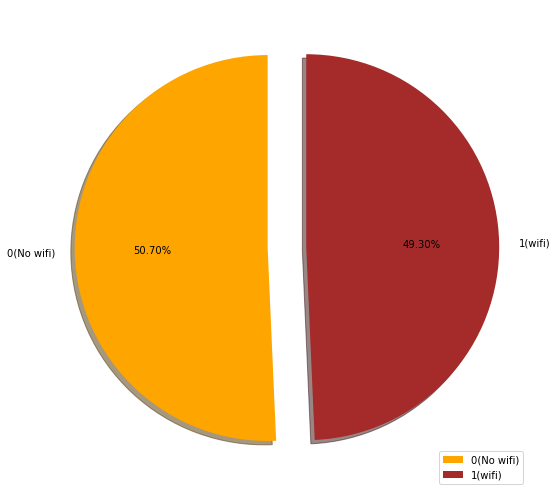

In [38]:

classification=dataset_train['wifi'].value_counts()
cls_label=['0(No wifi)', '1(wifi)']
class_label={}
leg_labels=['0(No wifi)', '1(wifi)']
label=dataset_train['wifi']
for i in label:
  if i not in class_label:
    class_label[i]=1
  else:
    class_label[i]+=1
print (class_label)
fig = plt.figure(figsize =(10, 7))
plt.pie(classification,labels=cls_label, startangle=90,colors=['orange','brown'], shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.legend(leg_labels, loc ="lower right")
plt.tight_layout()
plt.show()

In [ ]:
#49.30% phones are popular for its wifi feature.


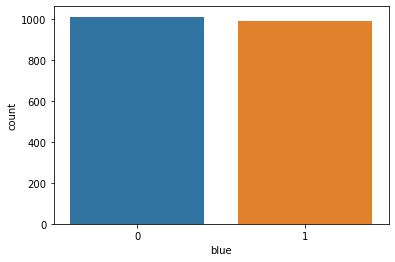

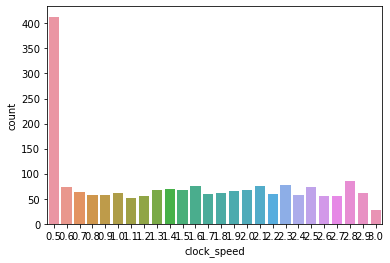

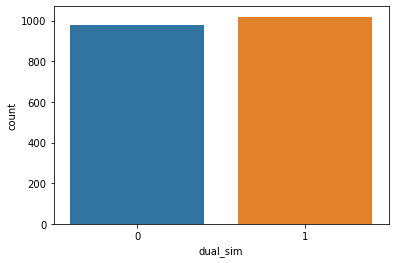

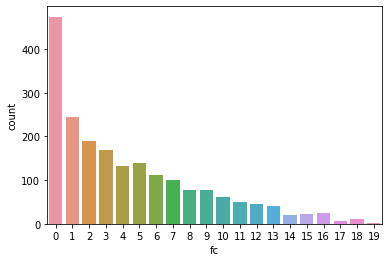

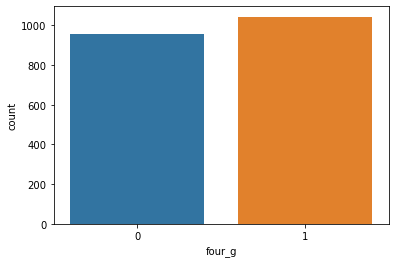

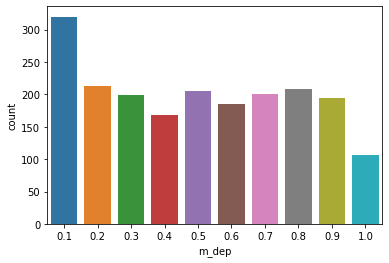

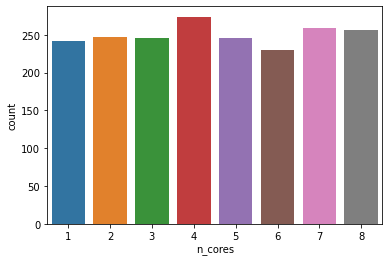

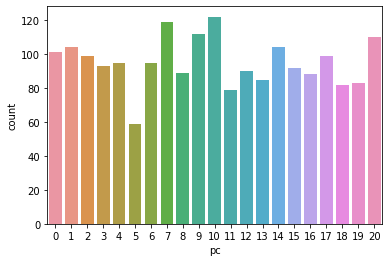

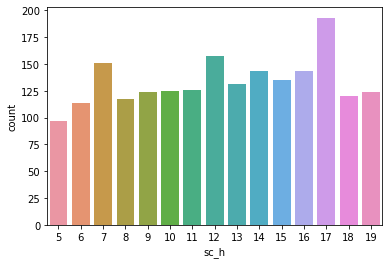

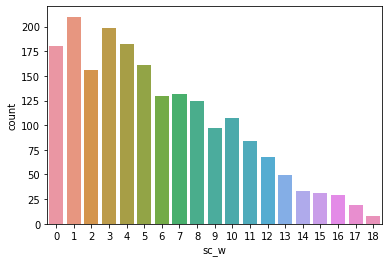

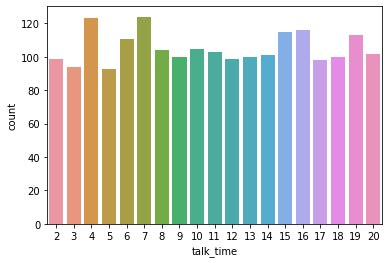

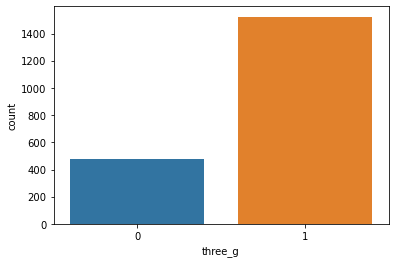

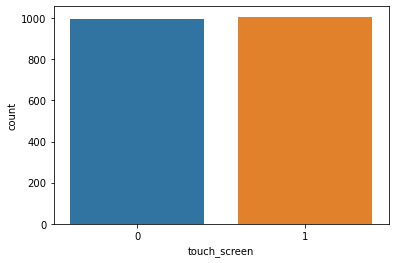

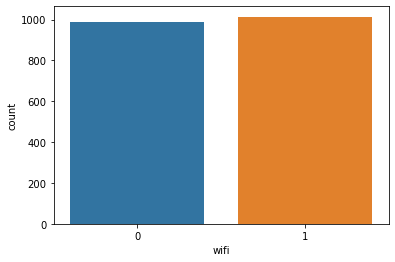

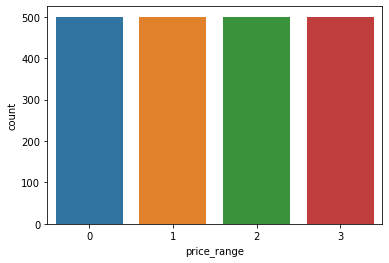

In [43]:
# CountPlot for various columns
for i in dataset_train:
    if(dataset_train[i].nunique()<30):
        sns.countplot(x=dataset_train[i])
        plt.show()

In [ ]:
#Density plot




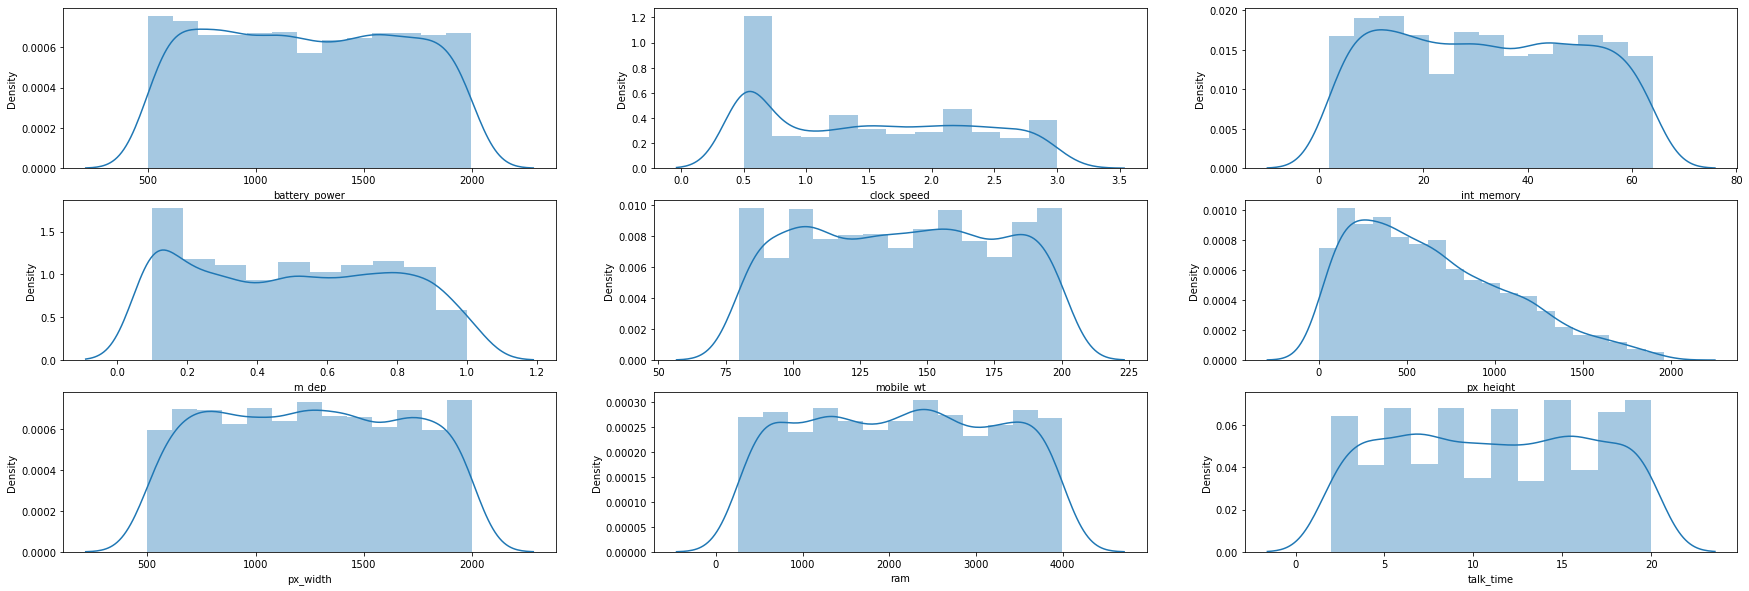

In [40]:
plt.figure(figsize=(30,10))
plt.subplot(331)
sns.distplot(dataset_train['battery_power'])
plt.subplot(332)
sns.distplot(dataset_train['clock_speed'])
plt.subplot(333)
sns.distplot(dataset_train['int_memory'])
plt.subplot(334)
sns.distplot(dataset_train['m_dep'])
plt.subplot(335)
sns.distplot(dataset_train['mobile_wt'])
plt.subplot(336)
sns.distplot(dataset_train['px_height'])
plt.subplot(337)
sns.distplot(dataset_train['px_width'])
plt.subplot(338)
sns.distplot(dataset_train['ram'])
plt.subplot(339)
sns.distplot(dataset_train['talk_time'])
plt.show()
     

# Classify the datset into software and hardware

In [44]:
dataset1 = dataset_train.loc[:,['battery_power','blue','four_g','mobile_wt','n_cores','px_height','px_width','price_range','talk_time','three_g','wifi','clock_speed']]
dataset1

,battery_power,blue,four_g,mobile_wt,n_cores,px_height,px_width,price_range,talk_time,three_g,wifi,clock_speed
0,842,0,0,188,2,20,756,1,19,0,1,2.2
1,1021,1,1,136,3,905,1988,2,7,1,0,0.5
2,563,1,1,145,5,1263,1716,2,9,1,0,0.5
3,615,1,0,131,6,1216,1786,2,11,1,0,2.5
4,1821,1,1,141,2,1208,1212,1,15,1,0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,106,6,1222,1890,0,19,1,0,0.5
1996,1965,1,0,187,4,915,1965,2,16,1,1,2.6
1997,1911,0,1,108,8,868,1632,3,5,1,0,0.9
1998,1512,0,1,145,5,336,670,0,19,1,1,0.9


In [45]:
dataset2 = dataset_train.loc[:,['dual_sim','fc','m_dep','int_memory','pc','ram','sc_h','sc_w','touch_screen']]
dataset2

,dual_sim,fc,m_dep,int_memory,pc,ram,sc_h,sc_w,touch_screen
0,0,1,0.6,7,2,2549,9,7,0
1,1,0,0.7,53,6,2631,17,3,1
2,1,2,0.9,41,6,2603,11,2,1
3,0,0,0.8,10,9,2769,16,8,0
4,0,13,0.6,44,14,1411,8,2,1
...,...,...,...,...,...,...,...,...,...
1995,1,0,0.8,2,14,668,13,4,1
1996,1,0,0.2,39,3,2032,11,10,1
1997,1,1,0.7,36,3,3057,9,1,1
1998,0,4,0.1,46,5,869,18,10,1


In [ ]:
#Merging Datasets

In [47]:
dataset3 = pd.concat([dataset1, dataset2], axis=1)
dataset3

,battery_power,blue,four_g,mobile_wt,n_cores,px_height,px_width,price_range,talk_time,three_g,...,clock_speed,dual_sim,fc,m_dep,int_memory,pc,ram,sc_h,sc_w,touch_screen
0,842,0,0,188,2,20,756,1,19,0,...,2.2,0,1,0.6,7,2,2549,9,7,0
1,1021,1,1,136,3,905,1988,2,7,1,...,0.5,1,0,0.7,53,6,2631,17,3,1
2,563,1,1,145,5,1263,1716,2,9,1,...,0.5,1,2,0.9,41,6,2603,11,2,1
3,615,1,0,131,6,1216,1786,2,11,1,...,2.5,0,0,0.8,10,9,2769,16,8,0
4,1821,1,1,141,2,1208,1212,1,15,1,...,1.2,0,13,0.6,44,14,1411,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,106,6,1222,1890,0,19,1,...,0.5,1,0,0.8,2,14,668,13,4,1
1996,1965,1,0,187,4,915,1965,2,16,1,...,2.6,1,0,0.2,39,3,2032,11,10,1
1997,1911,0,1,108,8,868,1632,3,5,1,...,0.9,1,1,0.7,36,3,3057,9,1,1
1998,1512,0,1,145,5,336,670,0,19,1,...,0.9,0,4,0.1,46,5,869,18,10,1


In [48]:
X=dataset_train.drop(['price_range'],axis=1)
y=dataset_train['price_range']

# Splitting of dataset

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [50]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (1500, 20)
X_test: (500, 20)
y_train: (1500,)
y_test: (500,)


# Modelling

In [51]:
y=dataset_train["price_range"]
y.value_counts(normalize=True)

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

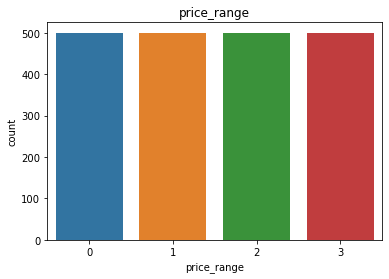

In [52]:
sns.countplot(y)
plt.title("price_range")
plt.show()

In [ ]:
#Target column price_range is balanced